# Pandas: Series + DataFrame

## Series

In [2]:
import pandas as pd

In [4]:
series = pd.Series([1, 3, 4, 0, -1])
series

0    1
1    3
2    4
3    0
4   -1
dtype: int64

In [6]:
series = pd.Series([1, 3, 4, 0, -1], name="My Numbers")
series

0    1
1    3
2    4
3    0
4   -1
Name: My Numbers, dtype: int64

In [7]:
series = pd.Series([1, 3, 4, 0, -1], name="My Numbers", index=[-1, -2, -3, -4, 0])
series

-1    1
-2    3
-3    4
-4    0
 0   -1
Name: My Numbers, dtype: int64

In [9]:
series[-1], series[-4], series[0]

(np.int64(1), np.int64(0), np.int64(-1))

In [10]:
series = pd.Series([1, 3, 4, 0, -1], name="My Numbers", index=["first", "second", "third", "forth", "fifth"])
series

first     1
second    3
third     4
forth     0
fifth    -1
Name: My Numbers, dtype: int64

In [12]:
series["first"], series["forth"], series["fifth"]

(np.int64(1), np.int64(0), np.int64(-1))

In [13]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata, name="USA States")
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
Name: USA States, dtype: int64

In [14]:
obj3 * 3

Ohio      105000
Texas     213000
Oregon     48000
Utah       15000
Name: USA States, dtype: int64

In [15]:
obj3 - 10_000

Ohio      25000
Texas     61000
Oregon     6000
Utah      -5000
Name: USA States, dtype: int64

In [18]:
obj3[obj3 > 17_000]

Ohio     35000
Texas    71000
Name: USA States, dtype: int64

# DataFrame

In [36]:
data = {
    'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada', 'UTA', "UTA"],
    'year': [2000, 2001, 2002, None, 2002, 2003, 2004, 2001],
    'pop': [1.5, None, 3.6, 2.4, 2.9, 3.2, None, 4.2]
}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000.0,1.5
1,Ohio,2001.0,NaN
2,Ohio,2002.0,3.6
3,Nevada,NaN,2.4
4,Nevada,2002.0,2.9
5,Nevada,2003.0,3.2
6,UTA,2004.0,NaN
7,UTA,2001.0,4.2


In [21]:
frame["state"]

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
6       UTA
7       UTA
Name: state, dtype: object

In [22]:
type(frame["state"])

pandas.core.series.Series

In [33]:
list(frame["state"])

['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada', 'UTA', 'UTA']

In [37]:
frame["state"] = ['Ohio', 'Ohio', 'New York', 'Nevada', 'Nevada', 'Nevada', 'UTA', 'UTA']
frame

,state,year,pop
0,Ohio,2000.0,1.5
1,Ohio,2001.0,NaN
2,New York,2002.0,3.6
3,Nevada,NaN,2.4
4,Nevada,2002.0,2.9
5,Nevada,2003.0,3.2
6,UTA,2004.0,NaN
7,UTA,2001.0,4.2


In [38]:
frame = frame.dropna().reset_index(drop=True)
frame

,state,year,pop
0,Ohio,2000.0,1.5
1,New York,2002.0,3.6
2,Nevada,2002.0,2.9
3,Nevada,2003.0,3.2
4,UTA,2001.0,4.2


In [39]:
year_per_pop: pd.Series = frame["year"] / frame["pop"]
frame["year_per_pop"] = year_per_pop.tolist()

In [40]:
frame

,state,year,pop,year_per_pop
0,Ohio,2000.0,1.5,1333.333333
1,New York,2002.0,3.6,556.111111
2,Nevada,2002.0,2.9,690.344828
3,Nevada,2003.0,3.2,625.937500
4,UTA,2001.0,4.2,476.428571


In [41]:
frame["year_mul_pop"] = list(frame["year"] * frame["pop"])

In [42]:
frame

,state,year,pop,year_per_pop,year_mul_pop
0,Ohio,2000.0,1.5,1333.333333,3000.0
1,New York,2002.0,3.6,556.111111,7207.2
2,Nevada,2002.0,2.9,690.344828,5805.8
3,Nevada,2003.0,3.2,625.937500,6409.6
4,UTA,2001.0,4.2,476.428571,8404.2


In [43]:
frame[["year", "pop", "year_per_pop", "year_mul_pop"]].corr()

,year,pop,year_per_pop,year_mul_pop
year,1.000000,0.469636,-0.667468,0.470893
pop,0.469636,1.000000,-0.963299,0.999999
year_per_pop,-0.667468,-0.963299,1.000000,-0.963628
year_mul_pop,0.470893,0.999999,-0.963628,1.000000


In [45]:
df_titanic = pd.read_csv("src/train.csv")
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: ylabel='Frequency'>

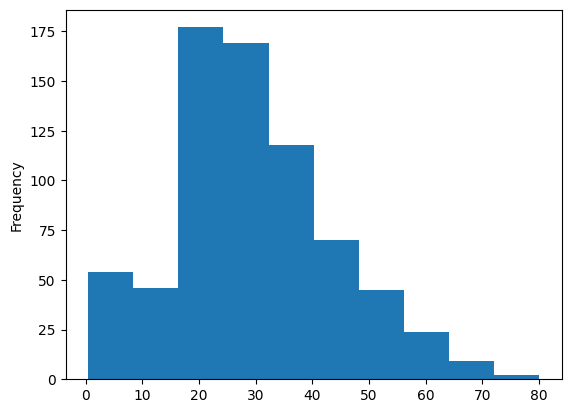

In [46]:
df_titanic["Age"].plot(kind="hist")

<Axes: xlabel='Age', ylabel='Fare'>

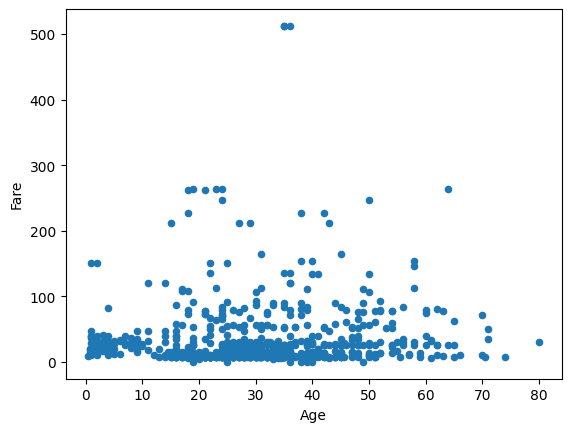

In [47]:
df_titanic.plot(kind="scatter", x="Age", y="Fare")

In [48]:
df_titanic["Sex_Num"] = [0 if val == "male" else 1 for val in list(df_titanic["Sex"])]

<Axes: xlabel='Age', ylabel='Sex_Num'>

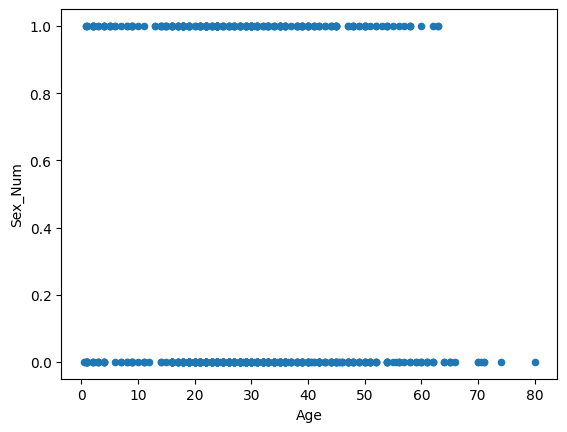

In [49]:
df_titanic.plot(kind="scatter", x="Age", y="Sex_Num")

<Axes: xlabel='Fare', ylabel='Sex_Num'>

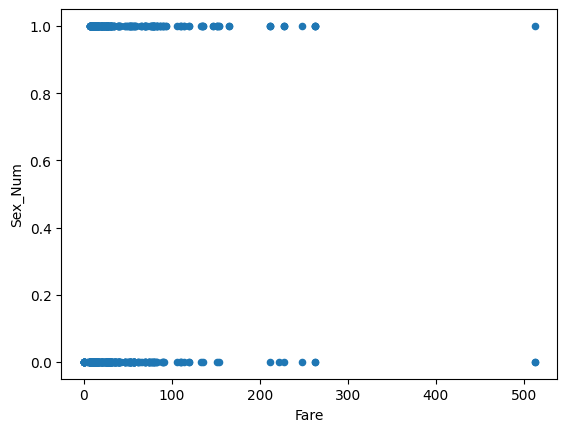

In [50]:
df_titanic.plot(kind="scatter", x="Fare", y="Sex_Num")

<Axes: >

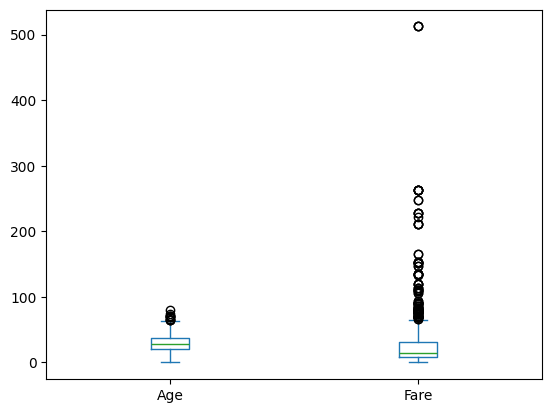

In [53]:
df_titanic[["Age", "Fare"]].plot(kind='box')